In [1]:
# -*- coding: utf-8 -*-
"""
Created on Mon Nov  5 14:37:29 2018

@author: epinsky
this scripts reads your ticker file (e.g. MSFT.csv) and
constructs a list of lines
"""
from pandas_datareader import data as web
import os
import pandas as pd
import numpy as np

ticker='bank'
input_dir = r'.'
ticker_file = os.path.join(input_dir, ticker + '.csv')
try:   
    with open(ticker_file) as f:
        lines = f.read().splitlines()
    print('opened file for ticker: ', ticker)
    """    your code for assignment 1 goes here
    """
    
except Exception as e:
    print(e)
    print('failed to read stock data for ticker: ', ticker)
    


opened file for ticker:  bank


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns


bank = pd.read_csv('bank.csv')
print(bank.isnull().sum())
print(bank.duplicated().value_counts())
#bank._get_numeric_data().columns.tolist()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64
False    11162
dtype: int64


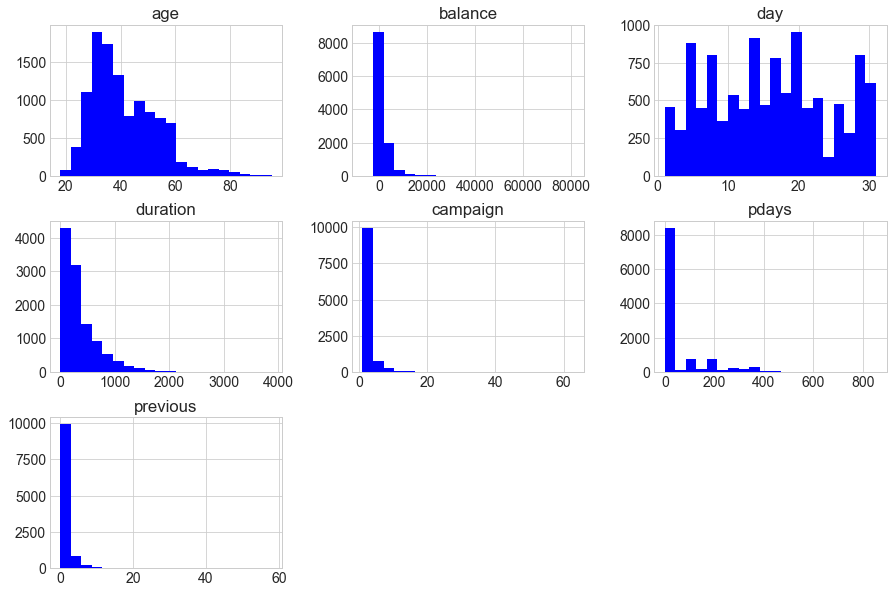

In [3]:
plt.style.use('seaborn-whitegrid')
plt.rc('font', size=14)
bank.hist(bins=20, figsize=(15,10), color='blue')

plt.show()

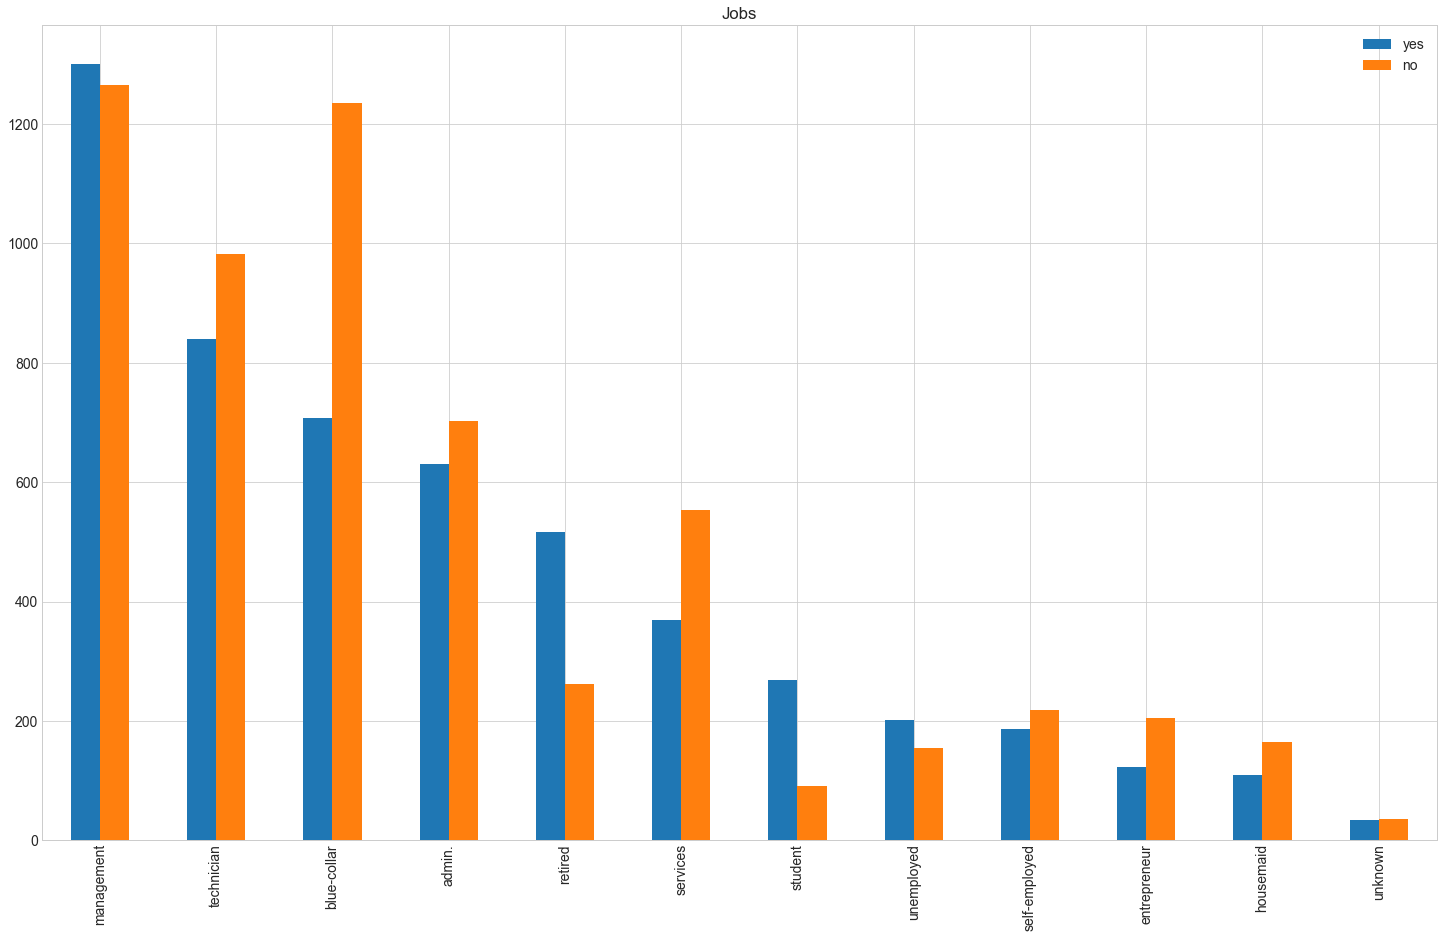

In [4]:
dfJob = pd.DataFrame()

dfJob['yes'] = bank[bank['deposit'] == 'yes']['job'].value_counts()
dfJob['no'] = bank[bank['deposit'] == 'no']['job'].value_counts()

dfJob.plot.bar(title = 'Jobs', figsize=(25,15))
plt.savefig('Jobs.png', bbox_inches='tight')

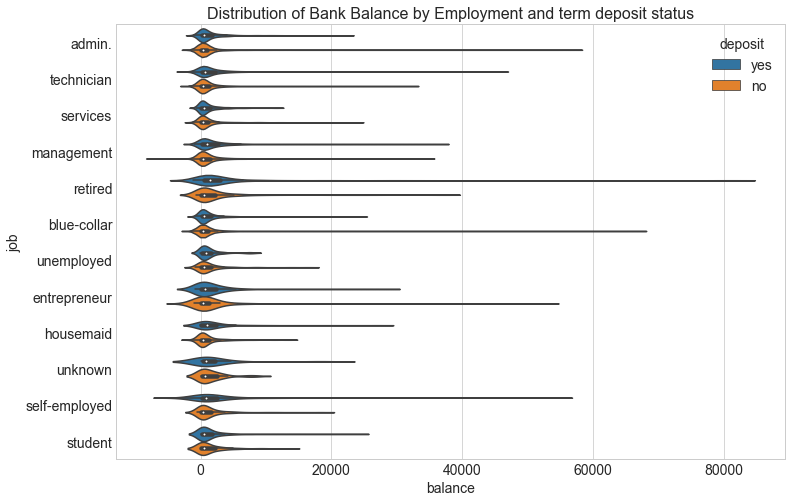

In [5]:
fig = plt.figure(figsize=(12,8))

sns.violinplot(x= "balance", y= "job", hue= "deposit",
            data = bank);

plt.title("Distribution of Bank Balance by Employment and term deposit status", fontsize=16)

plt.show()

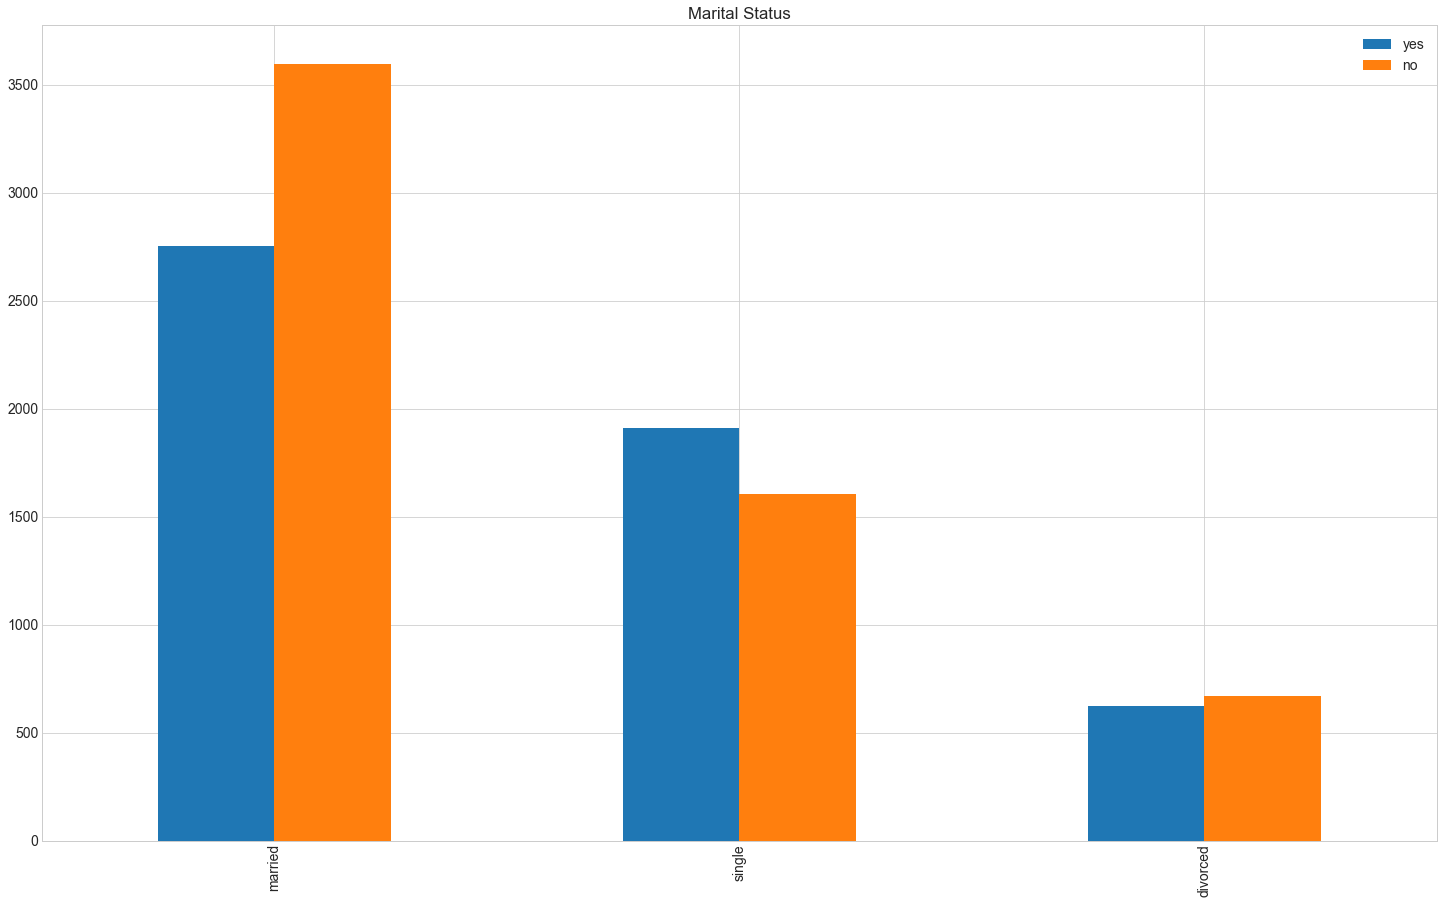

In [6]:
dfJob = pd.DataFrame()

dfJob['yes'] = bank[bank['deposit'] == 'yes']['marital'].value_counts()
dfJob['no'] = bank[bank['deposit'] == 'no']['marital'].value_counts()

dfJob.plot.bar(title = 'Marital Status', figsize=(25,15))
plt.savefig('marital.png', bbox_inches='tight')

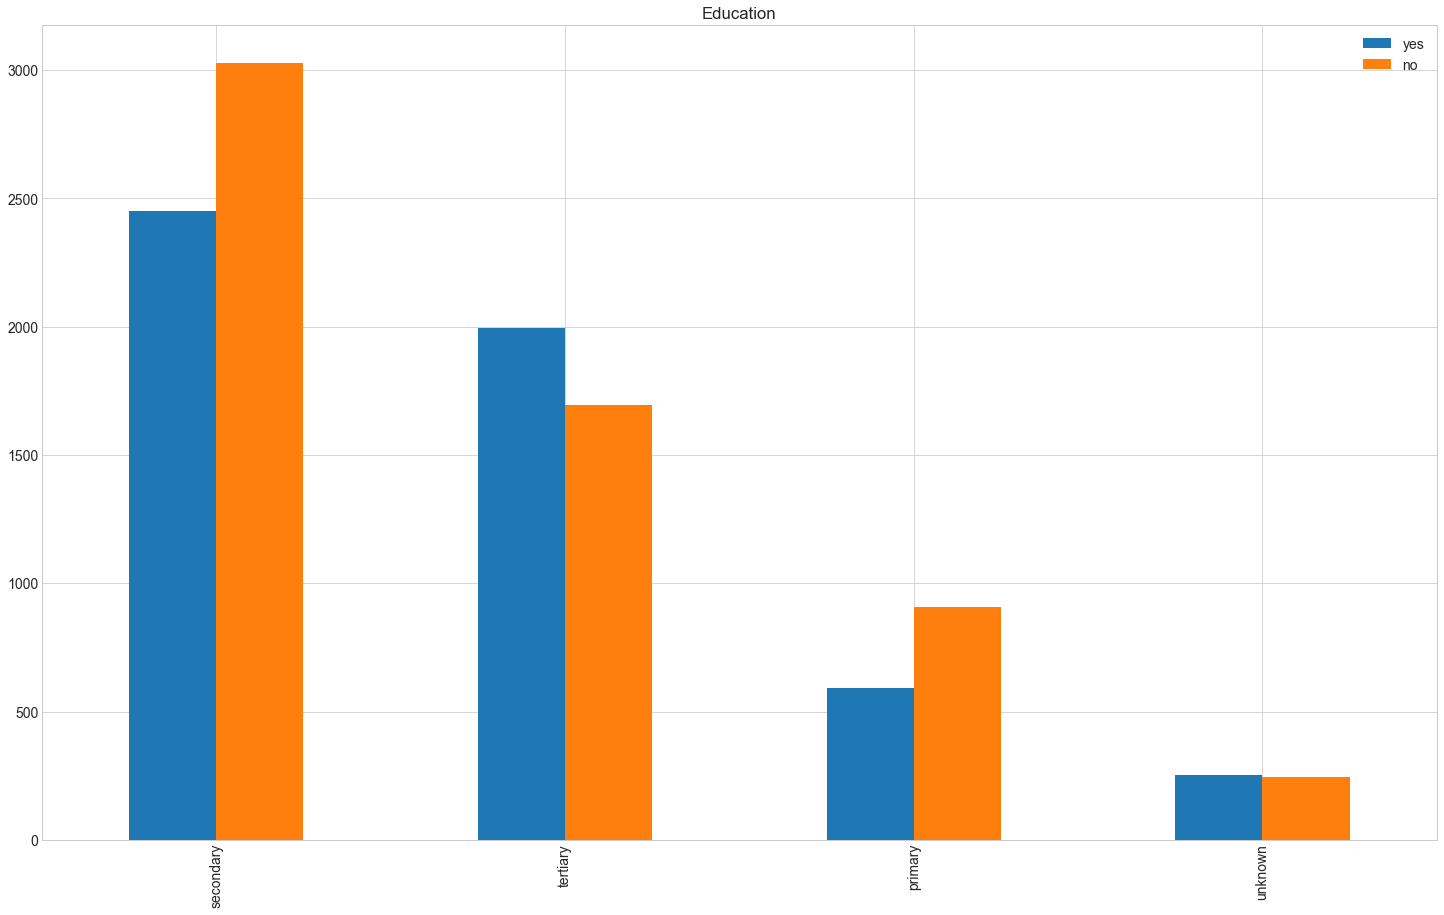

In [7]:
dfJob = pd.DataFrame()

dfJob['yes'] = bank[bank['deposit'] == 'yes']['education'].value_counts()
dfJob['no'] = bank[bank['deposit'] == 'no']['education'].value_counts()

dfJob.plot.bar(title = 'Education', figsize=(25,15))
plt.savefig('education.png', bbox_inches='tight')

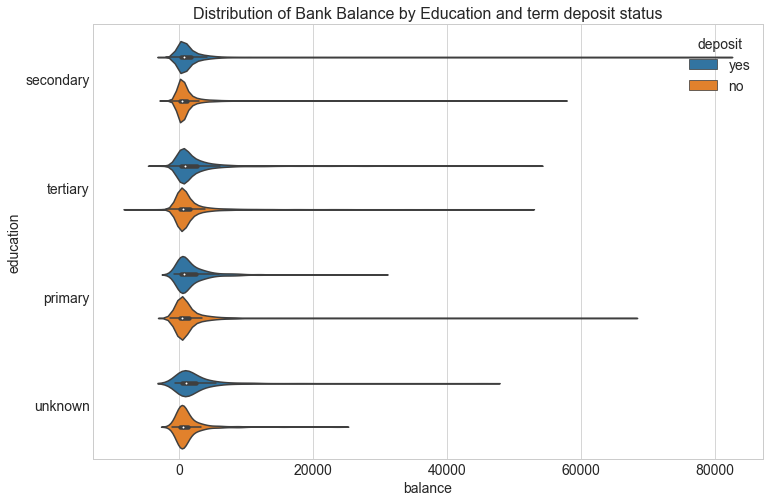

In [8]:
fig = plt.figure(figsize=(12,8))

sns.violinplot(x= "balance", y= "education", hue= "deposit",
            data = bank);

plt.title("Distribution of Bank Balance by Education and term deposit status", fontsize=16)

plt.show()

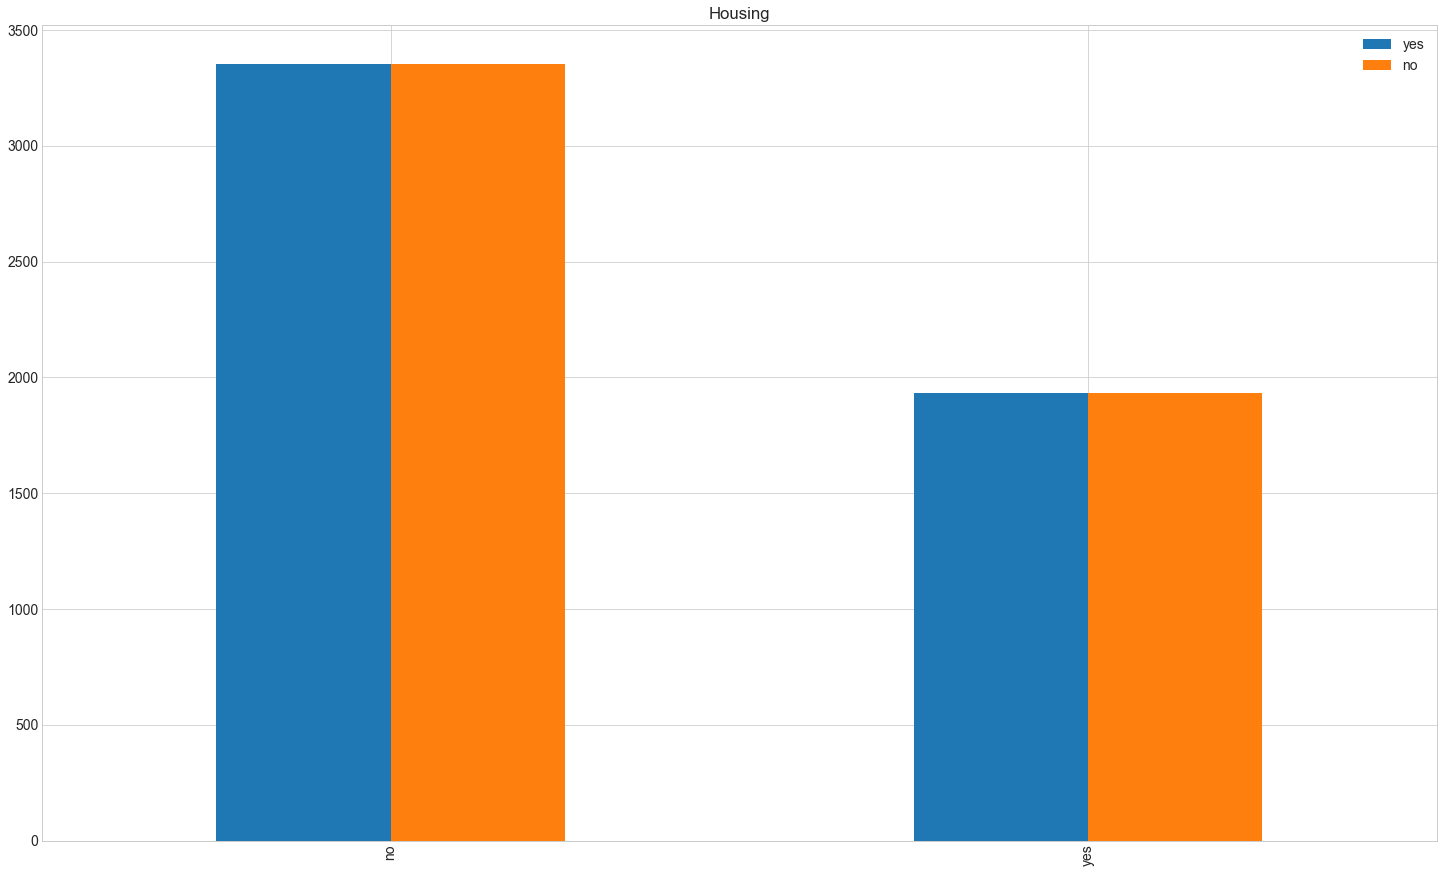

In [9]:
dfJob = pd.DataFrame()

dfJob['yes'] = bank[bank['deposit'] == 'yes']['housing'].value_counts()
dfJob['no'] = bank[bank['deposit'] == 'yes']['housing'].value_counts()

dfJob.plot.bar(title = 'Housing', figsize=(25,15))
plt.savefig('housing.png', bbox_inches='tight')

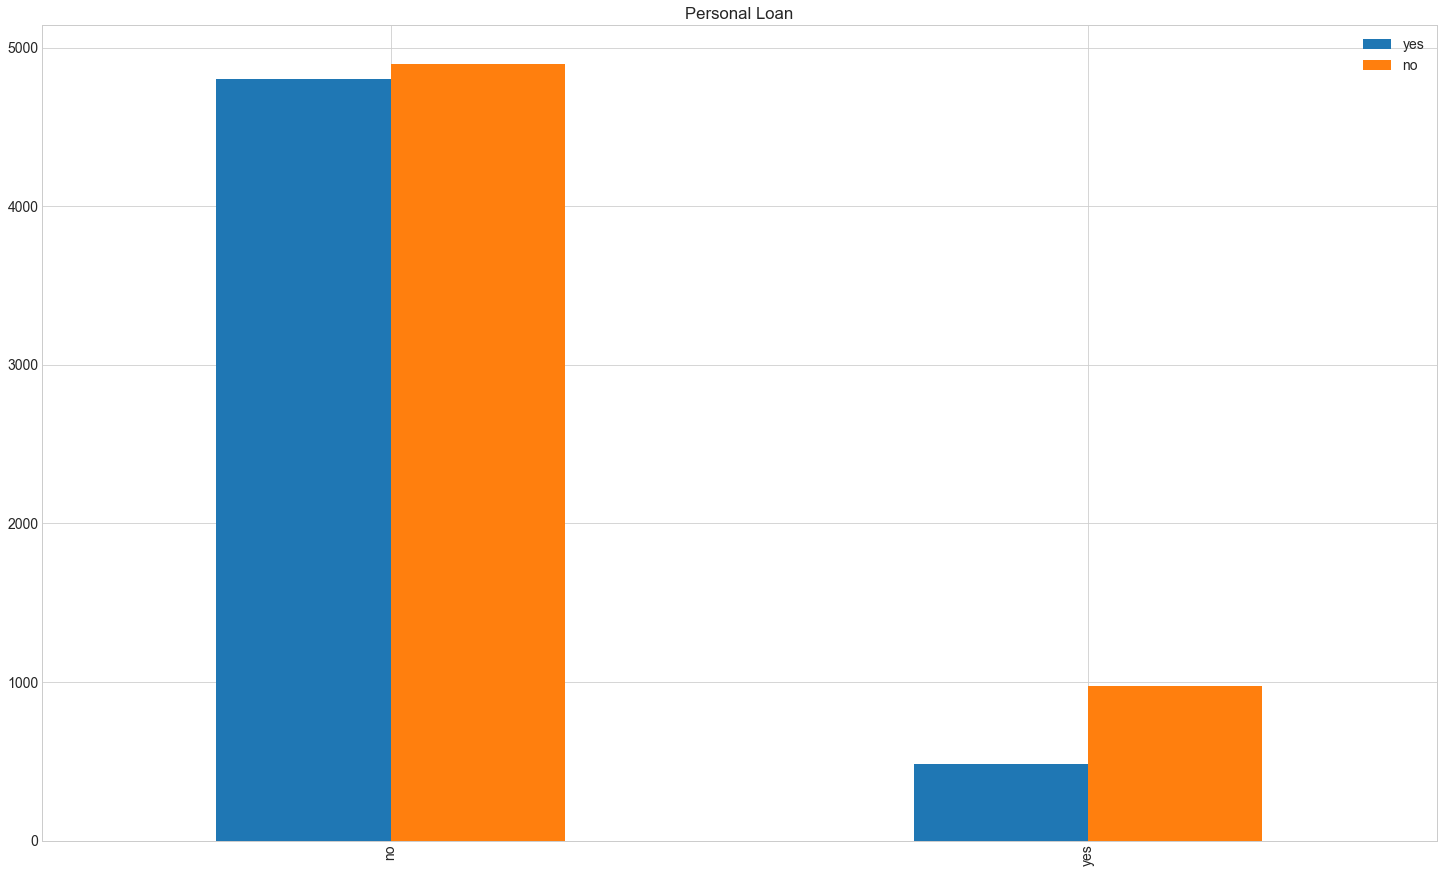

In [10]:
dfJob = pd.DataFrame()

dfJob['yes'] = bank[bank['deposit'] == 'yes']['loan'].value_counts()
dfJob['no'] = bank[bank['deposit'] == 'no']['loan'].value_counts()

dfJob.plot.bar(title = 'Personal Loan', figsize=(25,15))
plt.savefig('loan.png', bbox_inches='tight')

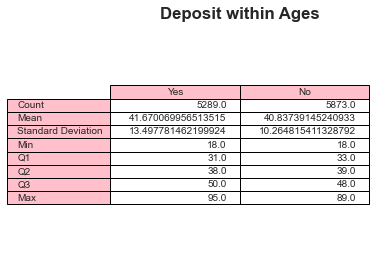

In [11]:
age = pd.DataFrame()
age['Yes'] = (bank[bank['deposit'] == 'yes'][['deposit','age']].describe())['age']
age['No'] = (bank[bank['deposit'] == 'no'][['deposit','age']].describe())['age']

fig, ax = plt.subplots()
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')
ax.set_title('Deposit within Ages', 
             fontweight ="bold") 
ax.table(cellText = age.values, colLabels = age.columns, rowLabels = ['Count', 'Mean', 'Standard Deviation', 'Min', 'Q1', 'Q2', 'Q3', 'Max'], 
         rowColours = ["pink"] * 10,  
         colColours = ["pink"] * 10, 
         loc = 'center')

fig.tight_layout()
plt.savefig('age.png')
#age



<AxesSubplot:title={'center':'Deposit-Age Summary'}>

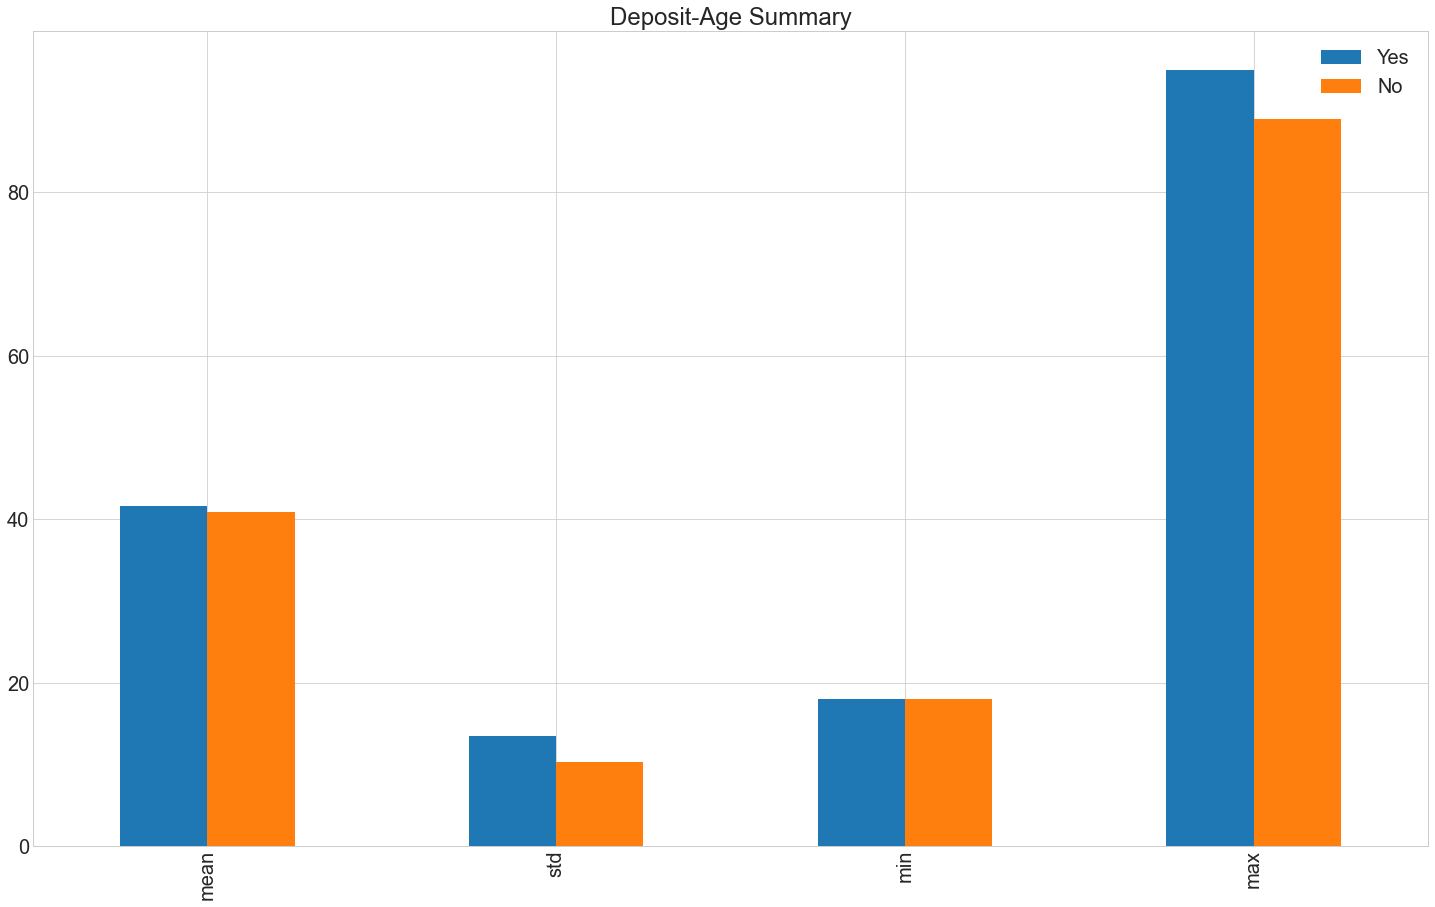

In [12]:
plt.rc('font', size=20)
age.drop(['count', '25%', '50%', '75%']).plot.bar(title = 'Deposit-Age Summary',  figsize=(25,15))

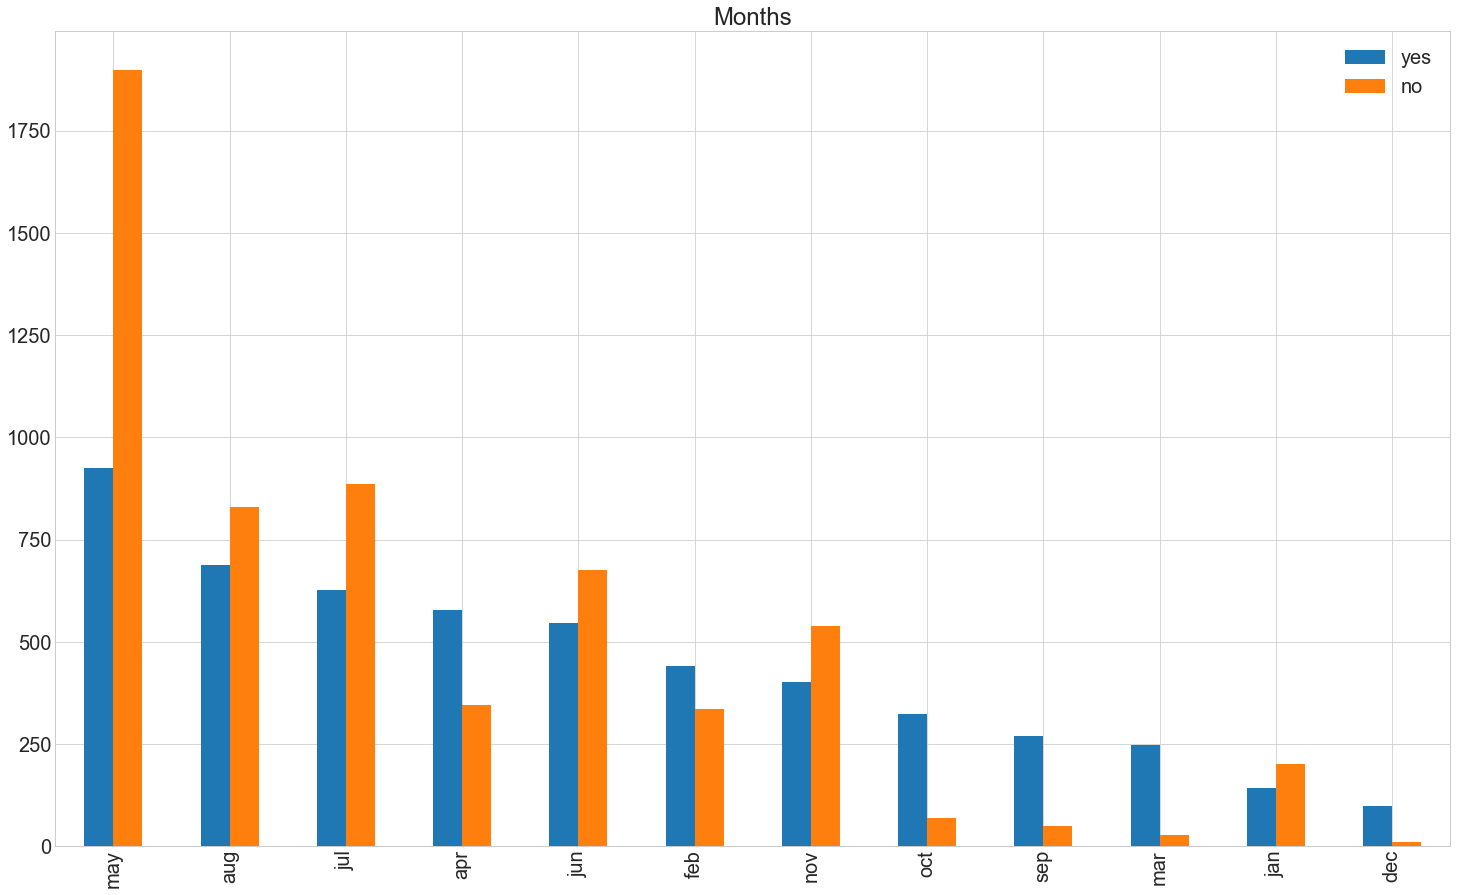

In [13]:
dfJob = pd.DataFrame()

dfJob['yes'] = bank[bank['deposit'] == 'yes']['month'].value_counts()
dfJob['no'] = bank[bank['deposit'] == 'no']['month'].value_counts()

dfJob.plot.bar(title = 'Months', figsize=(25,15))
plt.savefig('marital.png', bbox_inches='tight')

In [14]:
df_bank = bank.copy()
df_bank['deposit'] = np.where(df_bank['deposit'] == "no", 0, 1)
df_bank['default'] = np.where(df_bank['default'] == "no", 0, 1)
df_bank['housing'] = np.where(df_bank['housing'] == "no", 0, 1)
df_bank['loan'] = np.where(df_bank['loan'] == "no", 0, 1)

df_bank = df_bank.drop(columns = ['poutcome'])
df_bank = df_bank.drop(columns = ['pdays'])
#df_bank = df_bank.drop(columns = ['duration'])
df_bank = pd.concat([df_bank.drop('marital', axis=1), pd.get_dummies(df_bank['marital'], prefix='marital', prefix_sep='_',  dummy_na=False)], axis=1)
df_bank = pd.concat([df_bank.drop('job', axis=1), pd.get_dummies(df_bank['job'], prefix='job', prefix_sep='_', dummy_na=False)], axis=1)
df_bank = pd.concat([df_bank.drop('education', axis=1), pd.get_dummies(df_bank['education'], prefix='education', prefix_sep='_', dummy_na=False)], axis=1)
df_bank = pd.concat([df_bank.drop('contact', axis=1), pd.get_dummies(df_bank['contact'], prefix='contact', prefix_sep='_', dummy_na=False)], axis=1)
df_bank = pd.concat([df_bank.drop('month', axis=1), pd.get_dummies(df_bank['month'], prefix='month', prefix_sep='_', dummy_na=False)], axis=1)
#df_bank = pd.concat([df_bank.drop('poutcome', axis=1), pd.get_dummies(df_bank['poutcome'], prefix='poutcome', prefix_sep='_', dummy_na=False)], axis=1)
#df_bank.to_csv (r'name.csv', index = False, header=True)

#df_bank


Overall Accuracy for Logistic Regression: 0.7968106074180255

True Negative: 2290
False Positive: 586
False Negative: 548
True Positive: 2157
True Positive Rate: 79.74
True Negative Ratio: 79.62 




Overall Accuracy for RandomForestClassifier: 0.8419638057695753

True Negative: 2335
False Positive: 541
False Negative: 341
True Positive: 2364
True Positive Rate: 87.39
True Negative Ratio: 81.19 



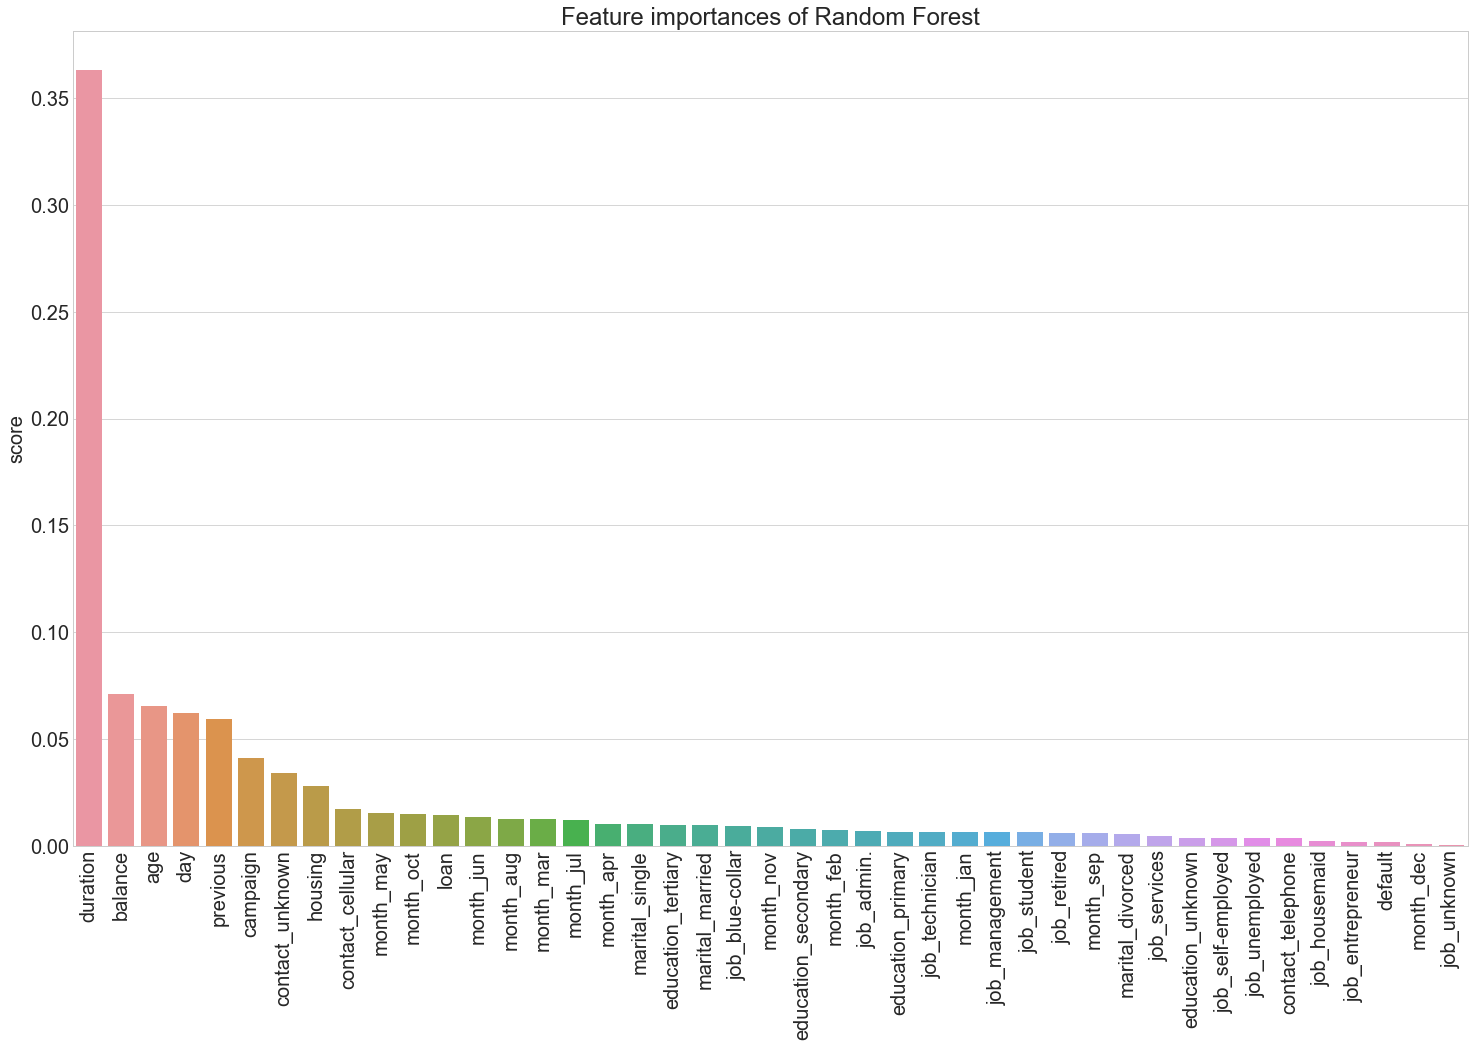






Overall Accuracy for Ada Boosting: 0.8104282386669056

True Negative: 2388
False Positive: 488
False Negative: 570
True Positive: 2135
True Positive Rate: 78.93
True Negative Ratio: 83.03 



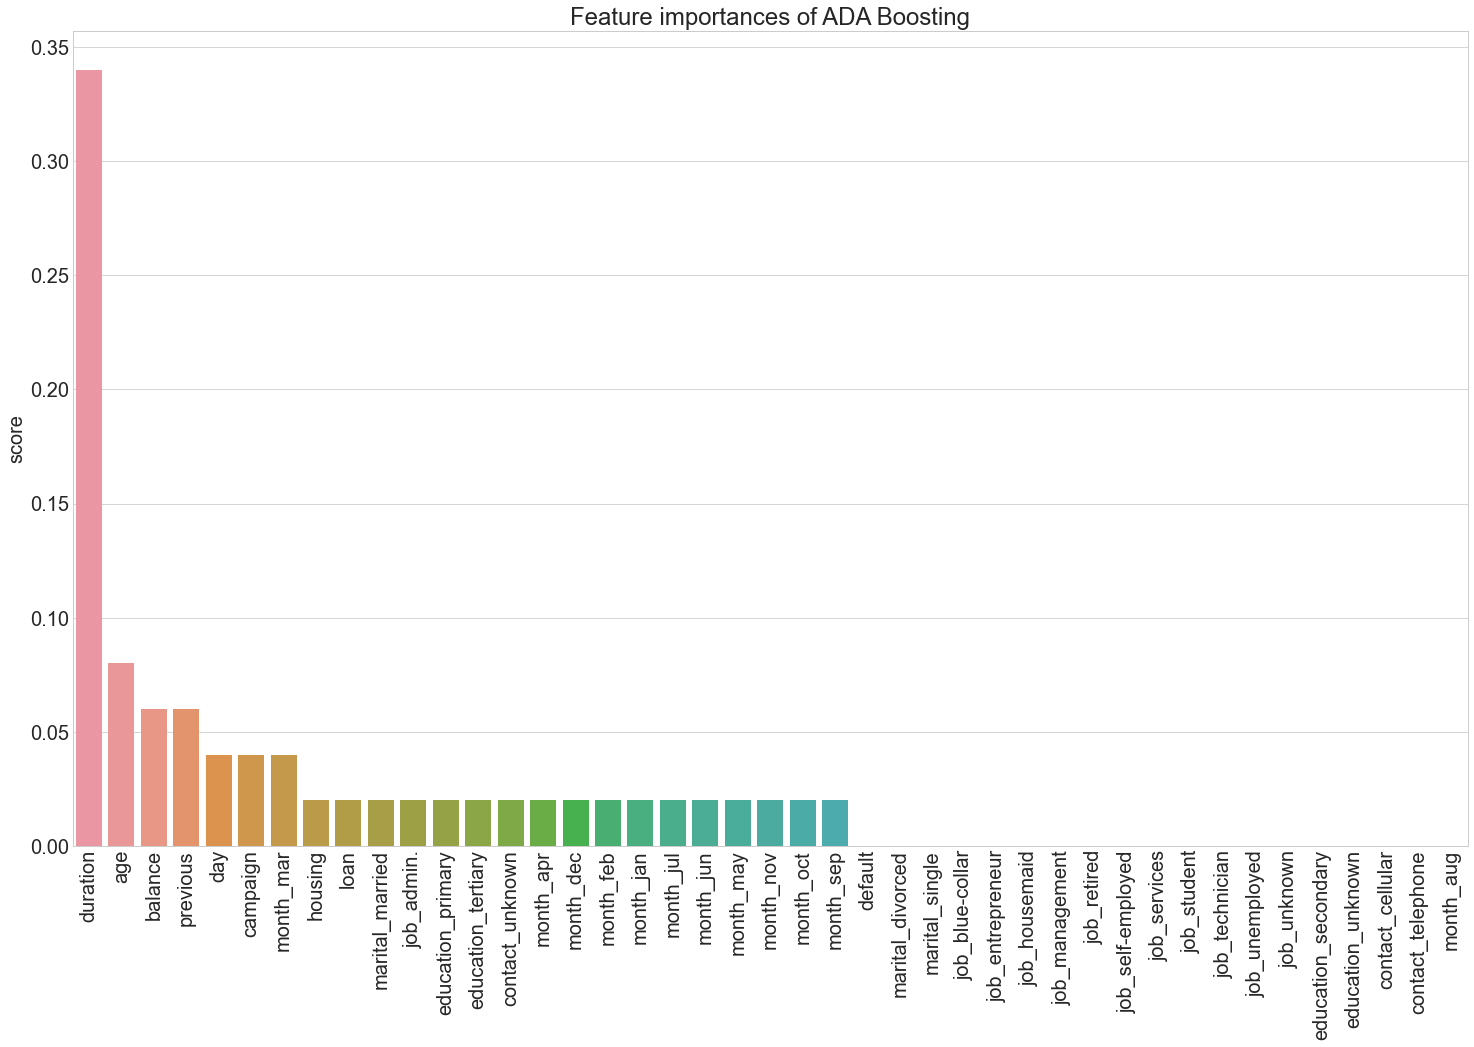

In [15]:
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression 
from sklearn.linear_model import LinearRegression 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn import svm 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score 
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB

import warnings 
warnings.filterwarnings('ignore')



X = df_bank.drop(columns = 'deposit')
y = df_bank[['deposit']]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size= 0.5, random_state = 42)


model = LogisticRegression() 
model.fit(X_train, y_train) 
y_pred = model.predict(X_test) 
logisticAccuracy = accuracy_score(y_test, y_pred) 
print(f"Overall Accuracy for Logistic Regression: {logisticAccuracy}\n")
tn, fp, fn, tp  = confusion_matrix(y_test, y_pred).ravel()
print('True Negative:', tn)
print('False Positive:', fp)
print('False Negative:', fn)
print('True Positive:', tp)
TPR = round((tp/(tp+fn))*100,2)
TNR = round((tn/(tn+fp))*100,2)
print('True Positive Rate:',TPR)
print('True Negative Ratio:',TNR,"\n\n\n\n")



model = RandomForestClassifier(n_estimators = 18, max_depth = 14, criterion = 'entropy', random_state = 42) 
model.fit(X_train,y_train) 
y_pred = model.predict(X_test)
rfcAccuracy = accuracy_score(y_test, y_pred)
print(f"Overall Accuracy for RandomForestClassifier: {rfcAccuracy}\n")
tn, fp, fn, tp  = confusion_matrix(y_test, y_pred).ravel()
print('True Negative:', tn)
print('False Positive:', fp)
print('False Negative:', fn)
print('True Positive:', tp)
TPR = round((tp/(tp+fn))*100,2)
TNR = round((tn/(tn+fp))*100,2)
print('True Positive Rate:',TPR)
print('True Negative Ratio:',TNR, "\n")


headers = ["name", "score"]
values = sorted(zip(X_train.columns, model.feature_importances_), key=lambda x: x[1] * -1)
feature_importances = pd.DataFrame(values, columns = headers)

x = np.arange(0, len(feature_importances))
plt.rc('font', size=20)
plt.gcf().set_size_inches(25, 15)
sns.barplot(x, feature_importances['score'])
plt.xticks(x, feature_importances['name'])
plt.xticks(rotation=90)
plt.title('Feature importances of Random Forest')
plt.show()
print("\n\n\n\n")

model = AdaBoostClassifier(learning_rate = 0.7) 
model.fit(X_train, y_train) 
y_pred = model.predict(X_test)
AdaAccuracy = accuracy_score(y_test, y_pred)
print(f"Overall Accuracy for Ada Boosting: {AdaAccuracy}\n")
tn, fp, fn, tp  = confusion_matrix(y_test, y_pred).ravel()
print('True Negative:', tn)
print('False Positive:', fp)
print('False Negative:', fn)
print('True Positive:', tp)
TPR = round((tp/(tp+fn))*100,2)
TNR = round((tn/(tn+fp))*100,2)
print('True Positive Rate:',TPR)
print('True Negative Ratio:',TNR,"\n")


headers = ["name", "score"]
values = sorted(zip(X_train.columns, model.feature_importances_), key=lambda x: x[1] * -1)
feature_importances = pd.DataFrame(values, columns = headers)

x = np.arange(0, len(feature_importances))
plt.rc('font', size=20)
plt.gcf().set_size_inches(25, 15)
sns.barplot(x, feature_importances['score'])
plt.xticks(x, feature_importances['name'])
plt.xticks(rotation=90)
plt.title('Feature importances of ADA Boosting')
plt.show()

In [16]:
model = GaussianNB() 
model.fit(X_train, y_train) 
y_pred = model.predict(X_test) 
gaussianAccuracy = accuracy_score(y_test, y_pred) 
print(f"Overall Accuracy for GaussianNB: {gaussianAccuracy}\n")


model = svm.SVC(kernel='rbf', C=70, gamma=0.001)
model.fit(X_train, y_train)
y_pred = model.predict(X_test) 
svmAccuracy = accuracy_score(y_test, y_pred) 
print(f"Overall Accuracy for SVM: {svmAccuracy}\n")


model = KNeighborsClassifier(n_neighbors = 3)
model.fit(X_train, y_train) 
y_pred = model.predict(X_test) 
knnAccuracy = accuracy_score(y_test, y_pred)
print(f"Overall Accuracy for KNN Neighbour classifier: {knnAccuracy}\n")



model = GradientBoostingClassifier() 
model.fit(X_train, y_train) 
y_pred = model.predict(X_test)
GradientAccuracy = accuracy_score(y_test, y_pred)
print(f"Overall Accuracy for Gradient Boosting: {GradientAccuracy}\n")

Overall Accuracy for GaussianNB: 0.7396523920444364

Overall Accuracy for SVM: 0.6760437197634832

Overall Accuracy for KNN Neighbour classifier: 0.6986203189392582

Overall Accuracy for Gradient Boosting: 0.8333631965597563



In [17]:
model = XGBClassifier(eval_metric='mlogloss')
model.fit(X_train,y_train) 
y_pred = model.predict(X_test) 
xgAccuracy = accuracy_score(y_test, y_pred)
print(f"Overall Accuracy for xgBoost: {xgAccuracy}\n")

Overall Accuracy for xgBoost: 0.8448306755061817

